In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

In [66]:
data = pd.read_csv('../csv_files/data_master.csv')

In [5]:
data.describe()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,0.378535,0.131044,2203.559106,2243.643216,4574.165955,0.103731,-144.290473,99.486727,-8.849705,36.246158,...,-6.018598,4.427786,-4.754633,1.768144,-3.863712,1.139427,-3.968078,0.491261,-2.331158,-1.111995
std,0.081883,0.065693,717.969086,527.223505,1578.427961,0.041963,100.140859,31.432833,21.685778,16.694646,...,6.831634,6.716254,6.173680,5.017892,4.883209,4.588773,4.549394,3.871345,3.759299,3.824745
min,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701,-552.064063,-1.527148,-89.901142,-18.768461,...,-28.052265,-15.805227,-27.542309,-12.598773,-17.545474,-15.693589,-17.227765,-11.975698,-18.504188,-19.935203
25%,0.319352,0.086748,1630.275197,1907.565019,3407.446062,0.070136,-200.469735,76.751282,-24.000498,24.068284,...,-10.969341,-0.571867,-9.347736,-1.658773,-7.179587,-1.857721,-7.189798,-2.035529,-4.663810,-3.376233
50%,0.383235,0.122036,2211.666863,2225.636126,4661.721811,0.099539,-120.206072,98.366971,-10.521044,36.841021,...,-5.920161,3.851799,-4.118990,1.877263,-3.603592,1.211944,-4.051804,0.665095,-2.392127,-1.171715
75%,0.436101,0.175871,2698.454031,2579.894826,5542.066488,0.132463,-74.038201,119.791220,5.595576,48.148069,...,-0.974525,9.699097,-0.123509,5.136433,-0.326469,4.346335,-0.849443,3.082430,0.133283,1.299199
max,0.663573,0.398012,4434.439444,3509.578677,8676.405868,0.274829,42.034587,193.096518,56.666090,80.691273,...,17.421038,23.037571,13.054333,18.161663,12.357588,13.468803,11.489994,15.379257,14.686910,15.368966


In [6]:
data.isnull().sum()

filename              0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

In [8]:
data.dtypes

filename               object
chroma_stft           float64
rmse                  float64
spectral_centroid     float64
spectral_bandwidth    float64
rolloff               float64
zero_crossing_rate    float64
mfcc1                 float64
mfcc2                 float64
mfcc3                 float64
mfcc4                 float64
mfcc5                 float64
mfcc6                 float64
mfcc7                 float64
mfcc8                 float64
mfcc9                 float64
mfcc10                float64
mfcc11                float64
mfcc12                float64
mfcc13                float64
mfcc14                float64
mfcc15                float64
mfcc16                float64
mfcc17                float64
mfcc18                float64
mfcc19                float64
mfcc20                float64
label                  object
dtype: object

In [9]:
data.filename

0      blues.00090.au
1      blues.00047.au
2      blues.00095.au
3      blues.00045.au
4      blues.00040.au
5      blues.00008.au
6      blues.00021.au
7      blues.00032.au
8      blues.00098.au
9      blues.00035.au
10     blues.00074.au
11     blues.00063.au
12     blues.00013.au
13     blues.00039.au
14     blues.00077.au
15     blues.00046.au
16     blues.00061.au
17     blues.00043.au
18     blues.00084.au
19     blues.00053.au
20     blues.00056.au
21     blues.00096.au
22     blues.00023.au
23     blues.00068.au
24     blues.00073.au
25     blues.00071.au
26     blues.00031.au
27     blues.00093.au
28     blues.00091.au
29     blues.00034.au
            ...      
960     rock.00040.au
961     rock.00067.au
962     rock.00095.au
963     rock.00015.au
964     rock.00064.au
965     rock.00098.au
966     rock.00012.au
967     rock.00057.au
968     rock.00069.au
969     rock.00073.au
970     rock.00044.au
971     rock.00074.au
972     rock.00061.au
973     rock.00013.au
974     ro

In [10]:
data.label

0      blues
1      blues
2      blues
3      blues
4      blues
5      blues
6      blues
7      blues
8      blues
9      blues
10     blues
11     blues
12     blues
13     blues
14     blues
15     blues
16     blues
17     blues
18     blues
19     blues
20     blues
21     blues
22     blues
23     blues
24     blues
25     blues
26     blues
27     blues
28     blues
29     blues
       ...  
960     rock
961     rock
962     rock
963     rock
964     rock
965     rock
966     rock
967     rock
968     rock
969     rock
970     rock
971     rock
972     rock
973     rock
974     rock
975     rock
976     rock
977     rock
978     rock
979     rock
980     rock
981     rock
982     rock
983     rock
984     rock
985     rock
986     rock
987     rock
988     rock
989     rock
Name: label, Length: 990, dtype: object

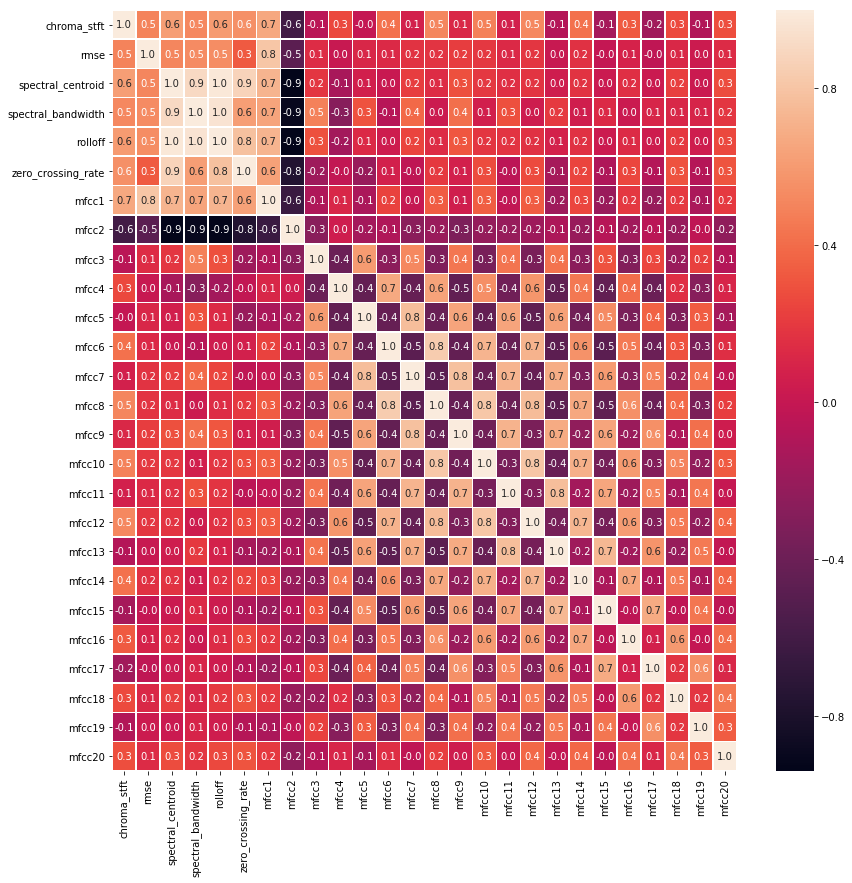

In [13]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [14]:
columns=["spectral_bandwidth","rolloff","mfcc7","mfcc8","mfcc11","mfcc12"]

In [15]:
data.label.unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [ ]:
data=data.

In [67]:
data1=data[["spectral_bandwidth","rolloff","mfcc7","mfcc8","mfcc11","mfcc12","mfcc3","mfcc15","mfcc16","mfcc17","mfcc18","mfcc19","mfcc20","label"]].copy()

In [68]:
data1

,spectral_bandwidth,rolloff,mfcc7,mfcc8,mfcc11,mfcc12,mfcc3,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,1972.202261,3470.404015,-9.058338,20.055258,-5.689818,1.384242,9.969873,-0.748612,5.065468,-5.084879,-2.795500,2.435524,-5.375209,blues
1,2310.305516,4849.495676,-9.776674,17.639806,-22.199284,5.430453,6.343454,-12.401641,9.624600,-5.014185,-3.704146,2.342511,4.161077,blues
2,1772.854380,2754.525010,-11.213042,27.246107,-1.197161,1.611758,-1.269146,-1.633326,0.956659,-4.840757,-5.966955,-2.782187,-6.494001,blues
3,2290.401739,4551.155813,-5.403830,26.500496,-20.552354,6.008639,12.979256,-17.545474,4.154533,-5.990226,-7.860423,-8.565096,1.857711,blues
4,2356.855937,5108.319111,-13.171819,20.535274,-21.433580,5.952405,-2.527487,-16.485552,6.542503,-5.695943,-3.640864,-4.856884,1.854516,blues
5,2031.643884,3781.318802,-19.172478,23.055617,-6.721190,7.010945,-14.742130,-5.175478,-1.444025,-7.037070,2.697451,3.409809,-2.698353,blues
6,1480.933764,1830.788929,3.207815,1.247171,3.368814,-1.520129,11.186486,-0.986607,-2.412860,-3.683063,0.496945,5.046816,-0.780009,blues
7,1882.919367,2764.099953,-13.467206,12.424733,-15.636263,-6.665247,18.791320,-7.380500,-15.693589,-10.958548,-10.877396,-18.504188,-19.110741,blues
8,2206.710936,4829.320798,-11.203329,20.085382,-14.092525,12.988067,-23.916267,-12.012914,4.822585,-11.156674,1.159210,-3.913956,3.250427,blues
9,2096.637631,3404.796078,-24.140309,18.545325,-20.761293,-4.984545,15.336581,-15.321158,-9.350151,-8.906130,-8.516965,-14.330011,-19.935203,blues


In [69]:
data1.groupby("label").sum()

,spectral_bandwidth,rolloff,mfcc7,mfcc8,mfcc11,mfcc12,mfcc3,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
label,,,,,,,,,,,,,
blues,191440.667019,360532.069912,-1065.917295,1388.043267,-967.146029,348.408885,-712.017131,-675.905576,21.935725,-716.605004,-141.437407,-357.443574,-276.738007
classical,150301.469143,244927.685622,-754.989519,-64.758750,-596.082027,-75.503256,-1949.896986,-49.987932,98.058300,14.952039,52.856136,-108.107728,-116.610182
country,207786.896933,390447.672350,-427.577418,779.911402,-689.949969,292.862595,-802.601349,-457.384967,-43.363405,-553.039319,-37.748267,-275.301055,-304.632767
disco,248905.656878,546626.752956,-637.438241,1307.887162,-720.464908,541.965536,-1005.985388,-519.023407,123.854624,-422.662903,108.033331,-289.288963,49.217183
hiphop,249435.615322,529593.459468,-301.427678,1264.925671,-264.460790,716.612830,-101.339645,-265.567445,260.204287,-288.567390,139.412417,-167.416410,-75.093701
jazz,200085.050341,371662.402608,-381.548285,472.681580,-421.423976,209.660144,-507.068253,-268.688432,45.679773,-143.448244,-94.411155,-115.973900,-206.316274
metal,222017.593299,507620.938819,-1217.890128,2241.599255,-1115.691186,1308.548782,-3105.969019,-871.774109,536.995529,-792.095853,282.472488,-474.549455,123.787053
pop,297601.531892,658631.425679,674.226654,173.071277,-212.411727,19.481260,1240.670973,-50.983654,-94.908953,-38.768292,46.781740,83.158023,23.179188
reggae,229143.115692,454701.725481,-24.021491,1095.540890,-137.367966,494.741630,-235.303088,-115.631062,96.482431,-367.825481,100.925566,-214.698641,-157.682847


In [79]:
data1.groupby("label").mean()

,spectral_bandwidth,rolloff,mfcc7,mfcc8,mfcc11,mfcc12,mfcc3,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
label,,,,,,,,,,,,,
blues,1933.744111,3641.738080,-10.766841,14.020639,-9.769152,3.519282,-7.192092,-6.827329,0.221573,-7.238434,-1.428661,-3.610541,-2.795333
classical,1518.196658,2474.017026,-7.626157,-0.654129,-6.021031,-0.762659,-19.695929,-0.504929,0.990488,0.151031,0.533900,-1.091997,-1.177881
country,2098.857545,3943.915882,-4.318964,7.877893,-6.969192,2.958208,-8.107084,-4.620050,-0.438014,-5.586256,-0.381296,-2.780819,-3.077099
disco,2514.198554,5521.482353,-6.438770,13.210981,-7.277423,5.474399,-10.161469,-5.242661,1.251057,-4.269322,1.091246,-2.922111,0.497143
hiphop,2519.551670,5349.428884,-3.044724,12.777027,-2.671321,7.238513,-1.023633,-2.682499,2.628326,-2.914822,1.408206,-1.691075,-0.758522
jazz,2021.061115,3754.165683,-3.854023,4.774561,-4.256808,2.117779,-5.121902,-2.714025,0.461412,-1.448972,-0.953648,-1.171454,-2.084003
metal,2242.601953,5127.484230,-12.301920,22.642417,-11.269608,13.217664,-31.373424,-8.805799,5.424197,-8.000968,2.853257,-4.793429,1.250374
pop,3006.076080,6652.842684,6.810370,1.748195,-2.145573,0.196780,12.532030,-0.514986,-0.958676,-0.391599,0.472543,0.839980,0.234133
reggae,2314.576926,4592.946722,-0.242641,11.066070,-1.387555,4.997390,-2.376799,-1.167991,0.974570,-3.715409,1.019450,-2.168673,-1.592756


In [113]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(data.label)
data.label = le.transform(data.label)

In [70]:
array=data1.values
X=array[:,0:13]
Y=array[:,13]

In [71]:
Y

array(['blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'cla

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state =22)

In [90]:
pd.DataFrame(y_train,  columns=['label']).groupby("label").value_counts()

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [91]:
y_train.unique()

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# logreg = LogisticRegression()
# logreg.fit(X, Y)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)

C:\Users\comp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\comp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
# y_pred = logreg.predict(X_test)
# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.36


In [33]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X, Y, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\Users\comp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\comp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\comp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\comp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\comp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver 

10-fold cross validation average accuracy: 0.000


C:\Users\comp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\comp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\comp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\comp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [34]:
from sklearn.metrics import confusion_matrix
# confusion_matrix = confusion_matrix(y_test, y_pred)
# print(confusion_matrix)

[[ 7  1  2  2  2  1  2  0  4  2]
 [ 2 21  1  0  0  2  1  0  1  0]
 [ 4  3  7  0  1  2  1  2  0  0]
 [ 2  0  0  3  1  2  7  4  1  0]
 [ 0  0  1  3  4  1  5  6 10  1]
 [ 4  6  3  0  3  0  0  1  5  0]
 [ 1  0  0  2  0  0 15  0  1  0]
 [ 1  0  2  0  1  2  0 21  1  0]
 [ 3  0  3  2  2  1  1  2  9  0]
 [ 7  0  1  4  1  4  5  5  5  2]]


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       blues       0.23      0.30      0.26        23
   classical       0.68      0.75      0.71        28
     country       0.35      0.35      0.35        20
       disco       0.19      0.15      0.17        20
      hiphop       0.27      0.13      0.17        31
        jazz       0.00      0.00      0.00        22
       metal       0.41      0.79      0.54        19
         pop       0.51      0.75      0.61        28
      reggae       0.24      0.39      0.30        23
        rock       0.40      0.06      0.10        34

   micro avg       0.36      0.36      0.36       248
   macro avg       0.33      0.37      0.32       248
weighted avg       0.34      0.36      0.32       248



In [74]:
from sklearn.ensemble import RandomForestClassifier
ranfor1=RandomForestClassifier(n_estimators=300,criterion='gini',max_depth=None,class_weight="balanced",min_samples_split=2,\
                          n_jobs=4)
ranfor1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=4, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [41]:
from sklearn import preprocessing

In [43]:
import sklearn

              precision    recall  f1-score   support

       blues       0.71      0.52      0.60        23
   classical       0.71      0.79      0.75        28
     country       0.32      0.55      0.41        20
       disco       0.24      0.30      0.27        20
      hiphop       0.55      0.39      0.45        31
        jazz       0.29      0.23      0.26        22
       metal       0.48      0.63      0.55        19
         pop       0.62      0.71      0.67        28
      reggae       0.39      0.52      0.44        23
        rock       0.57      0.24      0.33        34

   micro avg       0.48      0.48      0.48       248
   macro avg       0.49      0.49      0.47       248
weighted avg       0.51      0.48      0.48       248



C:\Users\comp\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


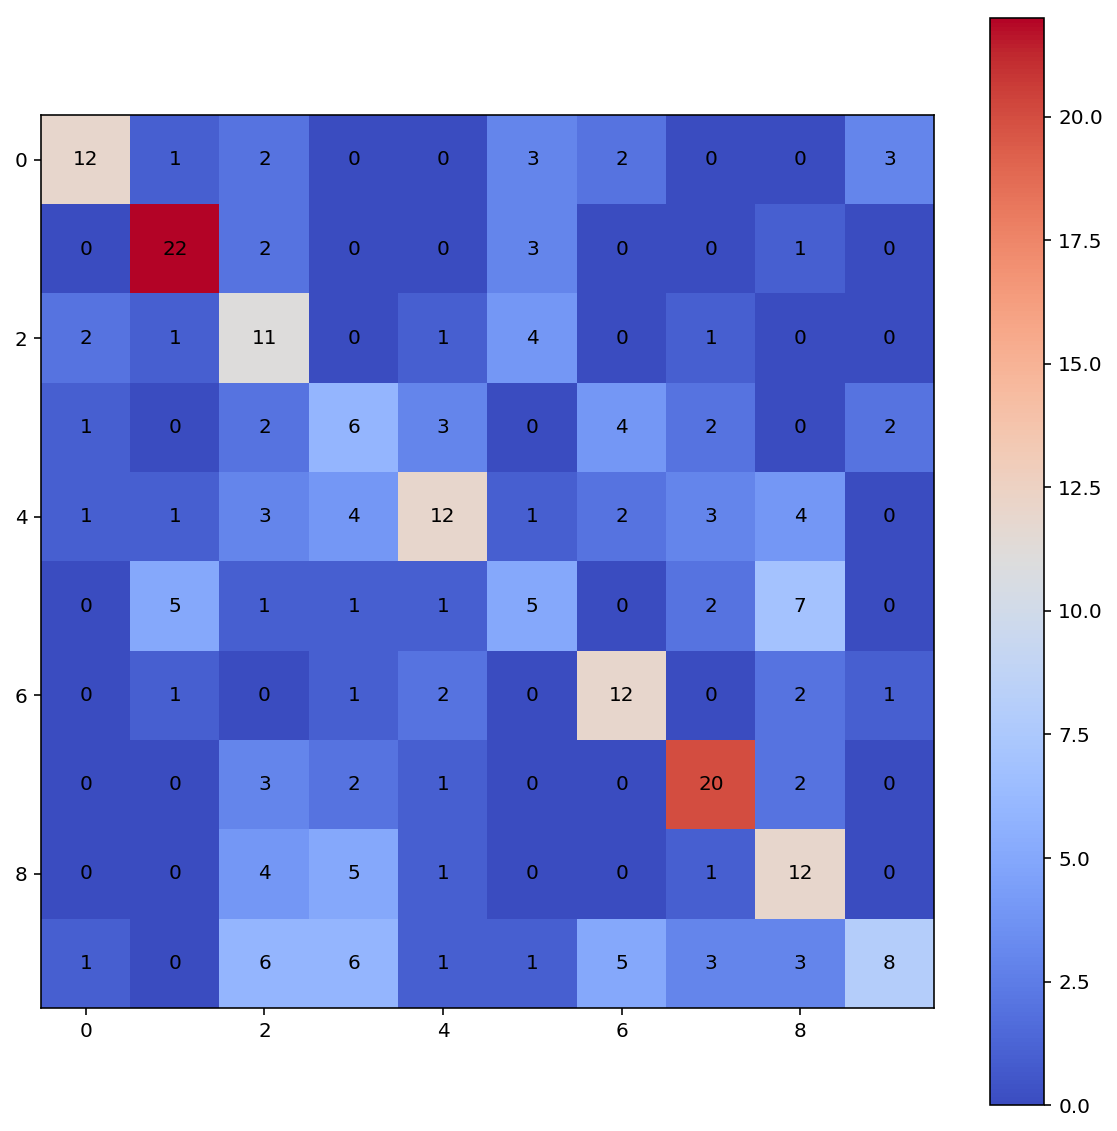

In [77]:
y_pred=ranfor1.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_pred))
plotConfMap(sklearn.metrics.confusion_matrix(y_test, y_pred))
plt.show()

In [78]:
logit_roc_auc = roc_auc_score(y_test, ranfor1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, ranfor1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF Area (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ValueError: multiclass format is not supported

In [76]:
import pandas as pd
import numpy as np
import re
import sklearn
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pylab import rcParams
%matplotlib inline
%config InlineBackend.figure_format='retina'
rcParams['figure.figsize'] = 8, 5.5

def plotConfMap(confMat, classes=[], relative=False):

    width = len(confMat)
    height = len(confMat[0])
    
    oldParams = rcParams['figure.figsize']
    rcParams['figure.figsize'] = width, height
    
    fig = plt.figure()
    plt.clf()
    plt.grid(False)
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    
    if not relative:
        res = ax.imshow(confMat, cmap='coolwarm', interpolation='nearest')
    else:
        res = ax.imshow(confMat, cmap='coolwarm', interpolation='nearest', vmin=0, vmax=100)

    for x in range(width):
        for y in range(height):
            ax.annotate(str(np.round(confMat[x][y], 1)), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')

    fig.colorbar(res)
    
    if len(classes) > 0:
        plt.xticks(range(width), classes)
        plt.yticks(range(height), classes)

    rcParams['figure.figsize'] = oldParams
    
    return fig

In [95]:
len(X)

990

In [114]:
X=data

In [92]:
import statsmodels.formula.api as sm

In [96]:
X=np.append(arr=X, values=np.ones((990,1)).astype(int),axis=1 )

In [115]:
X.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.377688,0.131890,1613.315725,1972.202261,3470.404015,0.058236,-177.490761,115.346103,9.969873,54.051329,...,1.384242,-5.837235,5.016452,-0.748612,5.065468,-5.084879,-2.795500,2.435524,-5.375209,0
1,0.336454,0.112245,2013.382437,2310.305516,4849.495676,0.075345,-149.951701,93.629480,6.343454,71.511946,...,5.430453,-7.462271,-4.335877,-12.401641,9.624600,-5.014185,-3.704146,2.342511,4.161077,0
2,0.369973,0.187148,1388.394749,1772.854380,2754.525010,0.057147,-130.553972,139.977099,-1.269146,39.323654,...,1.611758,-6.628307,4.952240,-1.633326,0.956659,-4.840757,-5.966955,-2.782187,-6.494001,0
3,0.429511,0.148366,1739.019621,2290.401739,4551.155813,0.048052,-163.211141,89.791041,12.979256,80.691273,...,6.008639,-2.910059,-0.434613,-17.545474,4.154533,-5.990226,-7.860423,-8.565096,1.857711,0
4,0.397725,0.134892,2272.495079,2356.855937,5108.319111,0.097657,-110.260079,90.701812,-2.527487,74.053272,...,5.952405,-8.033586,4.239868,-16.485552,6.542503,-5.695943,-3.640864,-4.856884,1.854516,0


In [119]:
data.columns

Index(['chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth',
       'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11',
       'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
       'mfcc19', 'mfcc20', 'label'],
      dtype='object')

In [116]:
X=np.append(arr=np.ones((990,1)).astype(int),values=X,axis=1)

In [117]:
X

array([[ 1.        ,  0.37768777,  0.1318901 , ...,  2.43552406,
        -5.37520922,  0.        ],
       [ 1.        ,  0.33645438,  0.11224513, ...,  2.34251052,
         4.16107727,  0.        ],
       [ 1.        ,  0.36997251,  0.18714833, ..., -2.78218692,
        -6.49400117,  0.        ],
       ...,
       [ 1.        ,  0.45184779,  0.11338224, ..., -4.80362409,
        -4.8049377 ,  9.        ],
       [ 1.        ,  0.32179637,  0.06303002, ..., -6.70012278,
        -1.20690916,  9.        ],
       [ 1.        ,  0.3959594 ,  0.10101242, ..., -2.61235111,
        -4.45212369,  9.        ]])

In [136]:
X_opt=X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]]

In [122]:
c=range(0,26,1)

In [124]:
[c]

[range(0, 26)]

In [104]:
data.columns

Index(['filename', 'chroma_stft', 'rmse', 'spectral_centroid',
       'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2',
       'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20', 'label'],
      dtype='object')

In [105]:
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00090.au,0.377688,0.131890,1613.315725,1972.202261,3470.404015,0.058236,-177.490761,115.346103,9.969873,...,1.384242,-5.837235,5.016452,-0.748612,5.065468,-5.084879,-2.795500,2.435524,-5.375209,blues
1,blues.00047.au,0.336454,0.112245,2013.382437,2310.305516,4849.495676,0.075345,-149.951701,93.629480,6.343454,...,5.430453,-7.462271,-4.335877,-12.401641,9.624600,-5.014185,-3.704146,2.342511,4.161077,blues
2,blues.00095.au,0.369973,0.187148,1388.394749,1772.854380,2754.525010,0.057147,-130.553972,139.977099,-1.269146,...,1.611758,-6.628307,4.952240,-1.633326,0.956659,-4.840757,-5.966955,-2.782187,-6.494001,blues
3,blues.00045.au,0.429511,0.148366,1739.019621,2290.401739,4551.155813,0.048052,-163.211141,89.791041,12.979256,...,6.008639,-2.910059,-0.434613,-17.545474,4.154533,-5.990226,-7.860423,-8.565096,1.857711,blues
4,blues.00040.au,0.397725,0.134892,2272.495079,2356.855937,5108.319111,0.097657,-110.260079,90.701812,-2.527487,...,5.952405,-8.033586,4.239868,-16.485552,6.542503,-5.695943,-3.640864,-4.856884,1.854516,blues


In [106]:
data=data.drop(columns=["filename"],axis=1)

In [107]:
data

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.377688,0.131890,1613.315725,1972.202261,3470.404015,0.058236,-177.490761,115.346103,9.969873,54.051329,...,1.384242,-5.837235,5.016452,-0.748612,5.065468,-5.084879,-2.795500,2.435524,-5.375209,blues
1,0.336454,0.112245,2013.382437,2310.305516,4849.495676,0.075345,-149.951701,93.629480,6.343454,71.511946,...,5.430453,-7.462271,-4.335877,-12.401641,9.624600,-5.014185,-3.704146,2.342511,4.161077,blues
2,0.369973,0.187148,1388.394749,1772.854380,2754.525010,0.057147,-130.553972,139.977099,-1.269146,39.323654,...,1.611758,-6.628307,4.952240,-1.633326,0.956659,-4.840757,-5.966955,-2.782187,-6.494001,blues
3,0.429511,0.148366,1739.019621,2290.401739,4551.155813,0.048052,-163.211141,89.791041,12.979256,80.691273,...,6.008639,-2.910059,-0.434613,-17.545474,4.154533,-5.990226,-7.860423,-8.565096,1.857711,blues
4,0.397725,0.134892,2272.495079,2356.855937,5108.319111,0.097657,-110.260079,90.701812,-2.527487,74.053272,...,5.952405,-8.033586,4.239868,-16.485552,6.542503,-5.695943,-3.640864,-4.856884,1.854516,blues
5,0.409037,0.142438,1719.213163,2031.643884,3781.318802,0.064028,-121.361024,122.513116,-14.742130,46.143444,...,7.010945,-12.741833,5.066005,-5.175478,-1.444025,-7.037070,2.697451,3.409809,-2.698353,blues
6,0.321085,0.101159,1046.748840,1480.933764,1830.788929,0.047937,-264.698399,138.855977,11.186486,48.520342,...,-1.520129,1.894727,6.325552,-0.986607,-2.412860,-3.683063,0.496945,5.046816,-0.780009,blues
7,0.276317,0.101234,1309.424564,1882.919367,2764.099953,0.039393,-288.801713,105.899617,18.791320,23.688490,...,-6.665247,-11.718800,-2.952338,-7.380500,-15.693589,-10.958548,-10.877396,-18.504188,-19.110741,blues
8,0.442972,0.125422,2310.280604,2206.710936,4829.320798,0.128426,-90.677485,100.093133,-23.916267,52.581125,...,12.988067,-11.415392,2.906069,-12.012914,4.822585,-11.156674,1.159210,-3.913956,3.250427,blues
9,0.288330,0.173407,1506.979392,2096.637631,3404.796078,0.045430,-171.786064,120.280233,15.336581,21.097281,...,-4.984545,-17.119595,-7.898076,-15.321158,-9.350151,-8.906130,-8.516965,-14.330011,-19.935203,blues


In [126]:
X_opt

array([[ 1.        ,  0.37768777,  0.1318901 , ..., -5.08487948,
        -2.79550001,  2.43552406],
       [ 1.        ,  0.33645438,  0.11224513, ..., -5.01418484,
        -3.70414552,  2.34251052],
       [ 1.        ,  0.36997251,  0.18714833, ..., -4.8407573 ,
        -5.96695517, -2.78218692],
       ...,
       [ 1.        ,  0.45184779,  0.11338224, ..., -6.89931753,
        -3.78037942, -4.80362409],
       [ 1.        ,  0.32179637,  0.06303002, ..., -8.98744616,
         6.86026328, -6.70012278],
       [ 1.        ,  0.3959594 ,  0.10101242, ...,  1.2299427 ,
        -0.15795342, -2.61235111]])

In [127]:
len(X_opt)

990

In [134]:
y=X[:,27]

In [135]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [129]:
X_opt.shape

(990, 26)

In [132]:
X.shape

(990, 28)

In [133]:
X[:,27]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [137]:
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()

In [138]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     14.36
Date:                Wed, 08 May 2019   Prob (F-statistic):           2.71e-52
Time:                        12:44:51   Log-Likelihood:                -2287.1
No. Observations:                 990   AIC:                             4628.
Df Residuals:                     963   BIC:                             4760.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.7509      3.611     -3.808      0.000     -20.838      -6.664
x1             4.1253      1.775      2.324      0.020       0.642       7.609
x2            -7.7444      2.810     -2.756      0.006     -13.260      -2.229
x3             0.0082      0.002      5.079      0.000       0.005       0.011
x4             0.0052      0.001      4.364      0.000       0.003       0.008
x5            -0.0028      0.001     -4.634      0.000      -0.004      -0.002
x6           -44.9594      9.539     -4.713      0.000     -63.679     -26.240
x7             0.0018      0.003      0.623      0.534      -0.004       0.007
x8             0.0481      0.011      4.365      0.000       0.026       0.070
x9            -0.0343      0.009     -4.005      0.000      -0.051      -0.017
x10            0.0125      0.009      1.451      0.147      -0.004       0.029
x11           -0.0305      0.012     -2.461      0.014      -0.055      -0.006
x12            0.0399      0.015      2.740      0.006       0.011       0.069
x13            0.0387      0.017      2.247      0.025       0.005       0.072
x14            0.0079      0.019      0.427      0.670      -0.029       0.044
x15            0.0331      0.019      1.774      0.076      -0.004       0.070
x16           -0.0288      0.021     -1.360      0.174      -0.070       0.013
x17            0.0147      0.022      0.678      0.498      -0.028       0.057
x18            0.0520      0.025      2.067      0.039       0.003       0.101
x19           -0.0284      0.026     -1.114      0.266      -0.078       0.022
x20           -0.0270      0.028     -0.972      0.331      -0.081       0.027
x21            0.0863      0.030      2.888      0.004       0.028       0.145
x22           -0.0707      0.028     -2.484      0.013      -0.127      -0.015
x23           -0.0455      0.029     -1.591      0.112      -0.102       0.011
x24            0.0648      0.031      2.081      0.038       0.004       0.126
x25           -0.0140      0.030     -0.461      0.645      -0.074       0.046
x26            0.0202      0.028      0.727      0.467      -0.034       0.075
==============================================================================
Omnibus:                       70.666   Durbin-Watson:                   0.364
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.831
Skew:                           0.198   Prob(JB):                     3.33e-07
Kurtosis:                       2.248   Cond. No.                     7.10e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [139]:
X_opt=X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     14.94
Date:                Wed, 08 May 2019   Prob (F-statistic):           7.54e-53
Time:                        12:48:25   Log-Likelihood:                -2287.2
No. Observations:                 990   AIC:                             4626.
Df Residuals:                     964   BIC:                             4754.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.6838      3.606     -3.794      0.000     -20.761      -6.607
x1             4.2616      1.745      2.442      0.015       0.837       7.687
x2            -7.7796      2.808     -2.770      0.006     -13.290      -2.269
x3             0.0081      0.002      5.063      0.000       0.005       0.011
x4             0.0052      0.001      4.373      0.000       0.003       0.008
x5            -0.0028      0.001     -4.622      0.000      -0.004      -0.002
x6           -44.9242      9.534     -4.712      0.000     -63.635     -26.214
x7             0.0018      0.003      0.635      0.526      -0.004       0.007
x8             0.0474      0.011      4.348      0.000       0.026       0.069
x9            -0.0345      0.009     -4.039      0.000      -0.051      -0.018
x10            0.0127      0.009      1.472      0.141      -0.004       0.030
x11           -0.0297      0.012     -2.426      0.015      -0.054      -0.006
x12            0.0423      0.013      3.137      0.002       0.016       0.069
x13            0.0377      0.017      2.212      0.027       0.004       0.071
x14            0.0331      0.019      1.776      0.076      -0.003       0.070
x15           -0.0262      0.020     -1.292      0.197      -0.066       0.014
x16            0.0144      0.022      0.665      0.506      -0.028       0.057
x17            0.0523      0.025      2.078      0.038       0.003       0.102
x18           -0.0291      0.025     -1.141      0.254      -0.079       0.021
x19           -0.0250      0.027     -0.913      0.361      -0.079       0.029
x20            0.0853      0.030      2.865      0.004       0.027       0.144
x21           -0.0691      0.028     -2.450      0.014      -0.124      -0.014
x22           -0.0462      0.029     -1.619      0.106      -0.102       0.010
x23            0.0652      0.031      2.096      0.036       0.004       0.126
x24           -0.0143      0.030     -0.470      0.638      -0.074       0.045
x25            0.0193      0.028      0.697      0.486      -0.035       0.074
==============================================================================
Omnibus:                       70.251   Durbin-Watson:                   0.364
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.832
Skew:                           0.200   Prob(JB):                     3.33e-07
Kurtosis:                       2.249   Cond. No.                     7.10e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [140]:
X_opt=X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,26]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     15.57
Date:                Wed, 08 May 2019   Prob (F-statistic):           2.09e-53
Time:                        12:49:26   Log-Likelihood:                -2287.3
No. Observations:                 990   AIC:                             4625.
Df Residuals:                     965   BIC:                             4747.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.6064      3.601     -3.778      0.000     -20.673      -6.539
x1             4.2822      1.744      2.455      0.014       0.860       7.705
x2            -7.8883      2.797     -2.820      0.005     -13.378      -2.399
x3             0.0081      0.002      5.064      0.000       0.005       0.011
x4             0.0052      0.001      4.408      0.000       0.003       0.008
x5            -0.0028      0.001     -4.673      0.000      -0.004      -0.002
x6           -44.7089      9.520     -4.697      0.000     -63.390     -26.028
x7             0.0019      0.003      0.665      0.506      -0.004       0.007
x8             0.0470      0.011      4.326      0.000       0.026       0.068
x9            -0.0344      0.009     -4.028      0.000      -0.051      -0.018
x10            0.0123      0.009      1.435      0.152      -0.005       0.029
x11           -0.0300      0.012     -2.449      0.015      -0.054      -0.006
x12            0.0424      0.013      3.147      0.002       0.016       0.069
x13            0.0371      0.017      2.183      0.029       0.004       0.070
x14            0.0337      0.019      1.812      0.070      -0.003       0.070
x15           -0.0260      0.020     -1.285      0.199      -0.066       0.014
x16            0.0134      0.022      0.620      0.536      -0.029       0.056
x17            0.0536      0.025      2.142      0.032       0.005       0.103
x18           -0.0306      0.025     -1.214      0.225      -0.080       0.019
x19           -0.0237      0.027     -0.873      0.383      -0.077       0.030
x20            0.0853      0.030      2.866      0.004       0.027       0.144
x21           -0.0682      0.028     -2.425      0.015      -0.123      -0.013
x22           -0.0489      0.028     -1.750      0.080      -0.104       0.006
x23            0.0614      0.030      2.044      0.041       0.002       0.120
x24            0.0142      0.025      0.558      0.577      -0.036       0.064
==============================================================================
Omnibus:                       70.634   Durbin-Watson:                   0.362
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.904
Skew:                           0.200   Prob(JB):                     3.21e-07
Kurtosis:                       2.248   Cond. No.                     7.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [141]:
X_opt=X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     16.24
Date:                Wed, 08 May 2019   Prob (F-statistic):           5.92e-54
Time:                        12:50:12   Log-Likelihood:                -2287.4
No. Observations:                 990   AIC:                             4623.
Df Residuals:                     966   BIC:                             4740.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.5670      3.599     -3.769      0.000     -20.630      -6.504
x1             4.2969      1.743      2.465      0.014       0.876       7.718
x2            -7.8788      2.796     -2.818      0.005     -13.366      -2.391
x3             0.0080      0.002      5.036      0.000       0.005       0.011
x4             0.0052      0.001      4.385      0.000       0.003       0.008
x5            -0.0028      0.001     -4.641      0.000      -0.004      -0.002
x6           -44.1817      9.469     -4.666      0.000     -62.764     -25.599
x7             0.0019      0.003      0.660      0.510      -0.004       0.007
x8             0.0469      0.011      4.317      0.000       0.026       0.068
x9            -0.0341      0.009     -4.008      0.000      -0.051      -0.017
x10            0.0122      0.009      1.423      0.155      -0.005       0.029
x11           -0.0301      0.012     -2.456      0.014      -0.054      -0.006
x12            0.0413      0.013      3.100      0.002       0.015       0.067
x13            0.0381      0.017      2.255      0.024       0.005       0.071
x14            0.0341      0.019      1.837      0.067      -0.002       0.070
x15           -0.0261      0.020     -1.288      0.198      -0.066       0.014
x16            0.0130      0.022      0.605      0.545      -0.029       0.055
x17            0.0558      0.025      2.263      0.024       0.007       0.104
x18           -0.0296      0.025     -1.176      0.240      -0.079       0.020
x19           -0.0224      0.027     -0.826      0.409      -0.075       0.031
x20            0.0825      0.029      2.813      0.005       0.025       0.140
x21           -0.0666      0.028     -2.382      0.017      -0.122      -0.012
x22           -0.0479      0.028     -1.719      0.086      -0.103       0.007
x23            0.0650      0.029      2.215      0.027       0.007       0.123
==============================================================================
Omnibus:                       71.035   Durbin-Watson:                   0.362
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.967
Skew:                           0.199   Prob(JB):                     3.11e-07
Kurtosis:                       2.247   Cond. No.                     7.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [142]:
X_opt=X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,18,19,20,21,22,23,24]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     16.98
Date:                Wed, 08 May 2019   Prob (F-statistic):           1.68e-54
Time:                        12:50:55   Log-Likelihood:                -2287.6
No. Observations:                 990   AIC:                             4621.
Df Residuals:                     967   BIC:                             4734.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.4342      3.591     -3.741      0.000     -20.482      -6.387
x1             4.3955      1.735      2.533      0.011       0.991       7.800
x2            -8.1068      2.770     -2.927      0.004     -13.543      -2.671
x3             0.0081      0.002      5.072      0.000       0.005       0.011
x4             0.0052      0.001      4.365      0.000       0.003       0.008
x5            -0.0028      0.001     -4.689      0.000      -0.004      -0.002
x6           -44.4094      9.459     -4.695      0.000     -62.971     -25.848
x7             0.0022      0.003      0.769      0.442      -0.003       0.008
x8             0.0467      0.011      4.301      0.000       0.025       0.068
x9            -0.0334      0.008     -3.963      0.000      -0.050      -0.017
x10            0.0125      0.009      1.459      0.145      -0.004       0.029
x11           -0.0293      0.012     -2.409      0.016      -0.053      -0.005
x12            0.0403      0.013      3.050      0.002       0.014       0.066
x13            0.0395      0.017      2.356      0.019       0.007       0.072
x14            0.0361      0.018      1.978      0.048       0.000       0.072
x15           -0.0261      0.020     -1.289      0.198      -0.066       0.014
x16            0.0563      0.025      2.285      0.023       0.008       0.105
x17           -0.0239      0.023     -1.025      0.306      -0.070       0.022
x18           -0.0208      0.027     -0.773      0.440      -0.074       0.032
x19            0.0842      0.029      2.889      0.004       0.027       0.141
x20           -0.0682      0.028     -2.447      0.015      -0.123      -0.014
x21           -0.0474      0.028     -1.702      0.089      -0.102       0.007
x22            0.0663      0.029      2.264      0.024       0.009       0.124
==============================================================================
Omnibus:                       72.294   Durbin-Watson:                   0.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.482
Skew:                           0.204   Prob(JB):                     2.40e-07
Kurtosis:                       2.244   Cond. No.                     7.05e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [143]:
X_opt=X[:,[0,1,2,3,4,5,6,8,9,10,11,12,13,15,16,18,19,20,21,22,23,24]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     17.77
Date:                Wed, 08 May 2019   Prob (F-statistic):           5.21e-55
Time:                        12:52:05   Log-Likelihood:                -2287.9
No. Observations:                 990   AIC:                             4620.
Df Residuals:                     968   BIC:                             4728.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.3305      2.612     -5.870      0.000     -20.456     -10.205
x1             4.5969      1.715      2.681      0.007       1.232       7.962
x2            -6.3488      1.566     -4.054      0.000      -9.422      -3.276
x3             0.0081      0.002      5.072      0.000       0.005       0.011
x4             0.0056      0.001      5.377      0.000       0.004       0.008
x5            -0.0028      0.001     -4.761      0.000      -0.004      -0.002
x6           -43.4399      9.372     -4.635      0.000     -61.832     -25.047
x7             0.0493      0.010      4.773      0.000       0.029       0.070
x8            -0.0374      0.007     -5.645      0.000      -0.050      -0.024
x9             0.0138      0.008      1.652      0.099      -0.003       0.030
x10           -0.0304      0.012     -2.515      0.012      -0.054      -0.007
x11            0.0417      0.013      3.184      0.002       0.016       0.067
x12            0.0399      0.017      2.382      0.017       0.007       0.073
x13            0.0350      0.018      1.926      0.054      -0.001       0.071
x14           -0.0270      0.020     -1.334      0.182      -0.067       0.013
x15            0.0554      0.025      2.250      0.025       0.007       0.104
x16           -0.0233      0.023     -1.000      0.317      -0.069       0.022
x17           -0.0216      0.027     -0.802      0.423      -0.074       0.031
x18            0.0835      0.029      2.866      0.004       0.026       0.141
x19           -0.0697      0.028     -2.509      0.012      -0.124      -0.015
x20           -0.0500      0.028     -1.809      0.071      -0.104       0.004
x21            0.0665      0.029      2.273      0.023       0.009       0.124
==============================================================================
Omnibus:                       72.411   Durbin-Watson:                   0.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.791
Skew:                           0.209   Prob(JB):                     2.06e-07
Kurtosis:                       2.244   Cond. No.                     6.98e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
X_opt=X[:,[0,1,2,3,4,5,6,8,9,10,11,12,13,15,16,18,19,21,22,23,24]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     18.63
Date:                Wed, 08 May 2019   Prob (F-statistic):           1.61e-55
Time:                        12:52:44   Log-Likelihood:                -2288.3
No. Observations:                 990   AIC:                             4619.
Df Residuals:                     969   BIC:                             4721.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.4074      2.610     -5.904      0.000     -20.528     -10.286
x1             4.5141      1.711      2.638      0.008       1.156       7.873
x2            -6.4347      1.562     -4.120      0.000      -9.500      -3.369
x3             0.0081      0.002      5.116      0.000       0.005       0.011
x4             0.0056      0.001      5.390      0.000       0.004       0.008
x5            -0.0028      0.001     -4.783      0.000      -0.004      -0.002
x6           -43.7761      9.361     -4.676      0.000     -62.147     -25.406
x7             0.0498      0.010      4.840      0.000       0.030       0.070
x8            -0.0377      0.007     -5.706      0.000      -0.051      -0.025
x9             0.0137      0.008      1.640      0.101      -0.003       0.030
x10           -0.0294      0.012     -2.442      0.015      -0.053      -0.006
x11            0.0413      0.013      3.158      0.002       0.016       0.067
x12            0.0407      0.017      2.436      0.015       0.008       0.073
x13            0.0361      0.018      1.989      0.047       0.000       0.072
x14           -0.0299      0.020     -1.502      0.133      -0.069       0.009
x15            0.0498      0.024      2.110      0.035       0.003       0.096
x16           -0.0263      0.023     -1.144      0.253      -0.072       0.019
x17            0.0799      0.029      2.776      0.006       0.023       0.136
x18           -0.0745      0.027     -2.747      0.006      -0.128      -0.021
x19           -0.0497      0.028     -1.801      0.072      -0.104       0.004
x20            0.0656      0.029      2.243      0.025       0.008       0.123
==============================================================================
Omnibus:                       72.184   Durbin-Watson:                   0.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.135
Skew:                           0.216   Prob(JB):                     1.73e-07
Kurtosis:                       2.247   Cond. No.                     6.97e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [145]:
X_opt=X[:,[0,1,2,3,4,5,6,8,9,10,11,12,13,15,16,18,21,22,23,24]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     19.53
Date:                Wed, 08 May 2019   Prob (F-statistic):           6.68e-56
Time:                        12:53:19   Log-Likelihood:                -2288.9
No. Observations:                 990   AIC:                             4618.
Df Residuals:                     970   BIC:                             4716.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.7999      2.587     -6.107      0.000     -20.877     -10.723
x1             4.3906      1.708      2.570      0.010       1.038       7.743
x2            -6.3040      1.558     -4.046      0.000      -9.361      -3.247
x3             0.0082      0.002      5.155      0.000       0.005       0.011
x4             0.0057      0.001      5.500      0.000       0.004       0.008
x5            -0.0029      0.001     -4.852      0.000      -0.004      -0.002
x6           -43.1980      9.349     -4.621      0.000     -61.545     -24.851
x7             0.0513      0.010      5.019      0.000       0.031       0.071
x8            -0.0381      0.007     -5.768      0.000      -0.051      -0.025
x9             0.0152      0.008      1.839      0.066      -0.001       0.031
x10           -0.0306      0.012     -2.551      0.011      -0.054      -0.007
x11            0.0427      0.013      3.276      0.001       0.017       0.068
x12            0.0381      0.017      2.300      0.022       0.006       0.071
x13            0.0339      0.018      1.878      0.061      -0.002       0.069
x14           -0.0278      0.020     -1.406      0.160      -0.067       0.011
x15            0.0446      0.023      1.925      0.055      -0.001       0.090
x16            0.0677      0.027      2.532      0.012       0.015       0.120
x17           -0.0769      0.027     -2.845      0.005      -0.130      -0.024
x18           -0.0534      0.027     -1.945      0.052      -0.107       0.000
x19            0.0727      0.029      2.546      0.011       0.017       0.129
==============================================================================
Omnibus:                       77.619   Durbin-Watson:                   0.358
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.536
Skew:                           0.222   Prob(JB):                     8.61e-08
Kurtosis:                       2.231   Cond. No.                     6.96e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [146]:
X_opt=X[:,[0,1,2,3,4,5,6,8,9,10,11,12,13,15,18,21,22,23,24]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     20.49
Date:                Wed, 08 May 2019   Prob (F-statistic):           3.72e-56
Time:                        12:53:49   Log-Likelihood:                -2289.9
No. Observations:                 990   AIC:                             4618.
Df Residuals:                     971   BIC:                             4711.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.0779      2.581     -6.229      0.000     -21.143     -11.013
x1             4.2057      1.704      2.468      0.014       0.862       7.550
x2            -6.3786      1.558     -4.094      0.000      -9.436      -3.321
x3             0.0084      0.002      5.332      0.000       0.005       0.012
x4             0.0057      0.001      5.478      0.000       0.004       0.008
x5            -0.0029      0.001     -4.968      0.000      -0.004      -0.002
x6           -43.9082      9.340     -4.701      0.000     -62.237     -25.579
x7             0.0531      0.010      5.232      0.000       0.033       0.073
x8            -0.0368      0.007     -5.623      0.000      -0.050      -0.024
x9             0.0155      0.008      1.877      0.061      -0.001       0.032
x10           -0.0305      0.012     -2.543      0.011      -0.054      -0.007
x11            0.0384      0.013      3.029      0.003       0.014       0.063
x12            0.0365      0.017      2.211      0.027       0.004       0.069
x13            0.0374      0.018      2.089      0.037       0.002       0.072
x14            0.0313      0.021      1.479      0.139      -0.010       0.073
x15            0.0678      0.027      2.535      0.011       0.015       0.120
x16           -0.0812      0.027     -3.022      0.003      -0.134      -0.028
x17           -0.0518      0.027     -1.889      0.059      -0.106       0.002
x18            0.0641      0.028      2.297      0.022       0.009       0.119
==============================================================================
Omnibus:                       82.669   Durbin-Watson:                   0.350
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.790
Skew:                           0.227   Prob(JB):                     4.60e-08
Kurtosis:                       2.217   Cond. No.                     6.95e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [147]:
X_opt=X[:,[0,1,2,3,4,5,6,8,9,10,11,12,13,15,21,22,23,24]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     21.54
Date:                Wed, 08 May 2019   Prob (F-statistic):           2.24e-56
Time:                        12:55:22   Log-Likelihood:                -2291.1
No. Observations:                 990   AIC:                             4618.
Df Residuals:                     972   BIC:                             4706.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.6532      2.553     -6.523      0.000     -21.663     -11.643
x1             4.7940      1.658      2.891      0.004       1.540       8.048
x2            -6.3764      1.559     -4.090      0.000      -9.435      -3.317
x3             0.0085      0.002      5.347      0.000       0.005       0.012
x4             0.0058      0.001      5.552      0.000       0.004       0.008
x5            -0.0029      0.001     -4.982      0.000      -0.004      -0.002
x6           -43.9505      9.346     -4.703      0.000     -62.291     -25.610
x7             0.0544      0.010      5.377      0.000       0.035       0.074
x8            -0.0373      0.007     -5.699      0.000      -0.050      -0.024
x9             0.0173      0.008      2.111      0.035       0.001       0.033
x10           -0.0322      0.012     -2.702      0.007      -0.056      -0.009
x11            0.0443      0.012      3.673      0.000       0.021       0.068
x12            0.0355      0.017      2.147      0.032       0.003       0.068
x13            0.0383      0.018      2.142      0.032       0.003       0.073
x14            0.0688      0.027      2.573      0.010       0.016       0.121
x15           -0.0706      0.026     -2.725      0.007      -0.122      -0.020
x16           -0.0556      0.027     -2.033      0.042      -0.109      -0.002
x17            0.0704      0.028      2.550      0.011       0.016       0.125
==============================================================================
Omnibus:                       87.779   Durbin-Watson:                   0.350
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.826
Skew:                           0.212   Prob(JB):                     4.52e-08
Kurtosis:                       2.200   Cond. No.                     6.95e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [149]:
data.columns
0,1,2,3,4,5,6,8,9,10,11,12,13,15,21,22,23,24

Index(['chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth',
       'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11',
       'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
       'mfcc19', 'mfcc20', 'label'],
      dtype='object')

In [152]:
features=['chroma_stft','rmse', 'spectral_centroid', 'spectral_bandwidth',
       'rolloff', 'zero_crossing_rate','mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc9','mfcc15', 'mfcc16', 'mfcc17', 'mfcc18']

In [153]:
len(features)

17

In [160]:
data_imp=data[['chroma_stft','rmse', 'spectral_centroid', 'spectral_bandwidth',
       'rolloff', 'zero_crossing_rate','mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc9','mfcc15', 'mfcc16', 'mfcc17', 'mfcc18','label']].copy()

In [161]:
data_imp.dtypes

chroma_stft           float64
rmse                  float64
spectral_centroid     float64
spectral_bandwidth    float64
rolloff               float64
zero_crossing_rate    float64
mfcc2                 float64
mfcc3                 float64
mfcc4                 float64
mfcc5                 float64
mfcc6                 float64
mfcc7                 float64
mfcc9                 float64
mfcc15                float64
mfcc16                float64
mfcc17                float64
mfcc18                float64
label                   int32
dtype: object

In [162]:
array=data_imp.values
X=array[:,0:17]
Y=array[:,17]

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state =22)

In [164]:
from sklearn.ensemble import RandomForestClassifier
ranfor1=RandomForestClassifier(n_estimators=300,criterion='gini',max_depth=None,class_weight="balanced",min_samples_split=2,\
                          n_jobs=4)
ranfor1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=4, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

              precision    recall  f1-score   support

         0.0       0.68      0.74      0.71        23
         1.0       0.96      0.96      0.96        28
         2.0       0.42      0.55      0.48        20
         3.0       0.25      0.30      0.27        20
         4.0       0.67      0.58      0.62        31
         5.0       0.59      0.77      0.67        22
         6.0       0.67      0.74      0.70        19
         7.0       0.79      0.68      0.73        28
         8.0       0.52      0.52      0.52        23
         9.0       0.48      0.29      0.36        34

   micro avg       0.61      0.61      0.61       248
   macro avg       0.60      0.61      0.60       248
weighted avg       0.62      0.61      0.61       248



C:\Users\comp\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


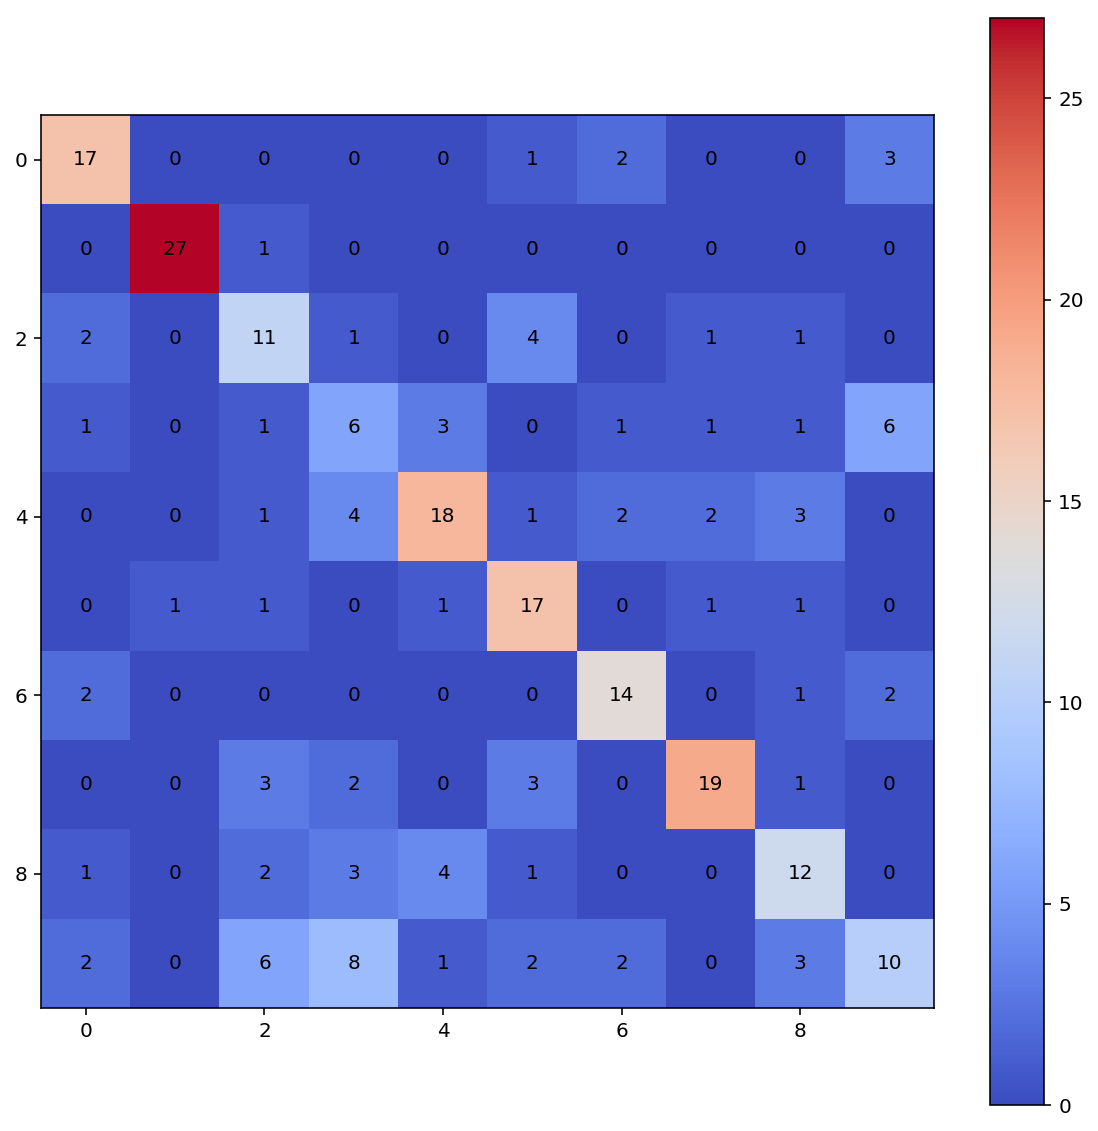

In [165]:
y_pred=ranfor1.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_pred))
plotConfMap(sklearn.metrics.confusion_matrix(y_test, y_pred))
plt.show()

In [166]:
151/218

0.6926605504587156

In [167]:
120/218

0.5504587155963303